In [101]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline


In [102]:
df=pd.read_csv("Book.csv")

In [103]:
df

,Hours,Result
0,2,0
1,3,0
2,5,0
3,7,0
4,10,0
5,11,0
6,12,0
7,13,1
8,14,1
9,16,1


In [104]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [105]:
df.keys()

Index(['Hours', 'Result'], dtype='object')

In [106]:
no_of_features=len(df['Result'])

In [108]:
print(no_of_features)

17


In [109]:
no_records=len(df['Hours'])

In [110]:
no_records

17

In [111]:
df

,Hours,Result
0,2,0
1,3,0
2,5,0
3,7,0
4,10,0
5,11,0
6,12,0
7,13,1
8,14,1
9,16,1


In [112]:
df.head()


,Hours,Result
0,2,0
1,3,0
2,5,0
3,7,0
4,10,0


In [113]:
df.shape

(17, 2)

In [114]:
scaler=StandardScaler()


In [115]:
df_scaled=scaler.fit_transform(df)

In [116]:
df_scaled

array([[-0.95649924, -1.06066017],
       [-0.90003922, -1.06066017],
       [-0.78711917, -1.06066017],
       [-0.67419912, -1.06066017],
       [-0.50481904, -1.06066017],
       [-0.44835902, -1.06066017],
       [-0.391899  , -1.06066017],
       [-0.33543897,  0.94280904],
       [-0.27897895,  0.94280904],
       [-0.1660589 ,  0.94280904],
       [-0.10959887, -1.06066017],
       [-0.05313885,  0.94280904],
       [ 0.0597812 ,  0.94280904],
       [ 0.17270125,  0.94280904],
       [ 0.22916128,  0.94280904],
       [ 2.43110224,  0.94280904],
       [ 2.71340236,  0.94280904]])

In [117]:
from sklearn.decomposition import PCA

In [120]:
pca=PCA(n_components=2)


In [121]:
pc12 = pca.fit_transform(df_scaled)

In [122]:
pc12.shape

(17, 2)

In [123]:
df_pca = pd.DataFrame(pc12,columns=['PC1','PC2'])
df_pca.head()

,PC1,PC2
0,-1.426347,0.073653
1,-1.386424,0.113576
2,-1.306577,0.193423
3,-1.226731,0.273269
4,-1.106961,0.393039


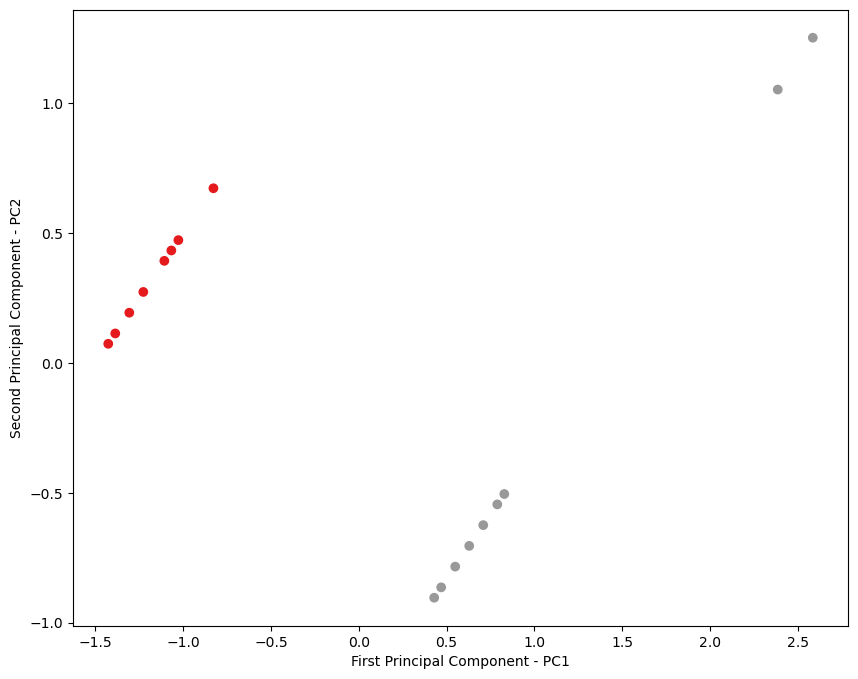

In [125]:
plt.figure(figsize=(10,8))
plt.scatter(
    x=df_pca['PC1'],
    y=df_pca['PC2'],
    c=df['Result'],
    cmap='Set1')
plt.xlabel('First Principal Component - PC1')
plt.ylabel('Second Principal Component - PC2');

# Logistic Regression (Classification) PCA

In [126]:
X = df_pca
y = df['Result']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [127]:
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression()
logR.fit(X_train,y_train)
predictions = logR.predict(X_test)

In [128]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))

[[3 0]
 [0 3]]


In [129]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

